In [5]:
import pandas as pd
import openpyxl
import os

In [4]:
# Ler arquivo Excel

df = pd.read_excel('/opt/transformados/acoes.xlsx')

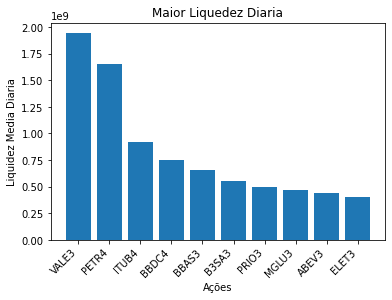

In [7]:
#@title Listar as 10 ações com maior Liquidez Média Diária e mostrar o resultado em um gráfico de colunas, sendo o eixo X os nomes dos ativos e o eixo Y o valor da Liquidez Média Diária

import matplotlib.pyplot as plt

df_temp = df.sort_values(by=' LIQUIDEZ MEDIA DIARIA', ascending=False).head(10)

plt.bar(df_temp['TICKER'], df_temp[' LIQUIDEZ MEDIA DIARIA'])

# Configurando os eixos e o título do gráfico
plt.xlabel('Ações')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Liquidez Media Diaria')
plt.title('Maior Liquedez Diaria')

# Local onde será salvo a imagem
path_file = "/opt/saida/"
if os.path.exists(path_file) is False:
  os.makedirs(path_file)  

# Salvando imagem
plt.savefig(f'{path_file} plot.png')
# Mostrando o gráfico
plt.show()

In [28]:
#@title Metodo para pegar o segmento
#Fonte planilha https://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/renda-variavel/empresas-listadas.htm

def get_segment(ticker_name):

  #Planilha da B3
  workbook = openpyxl.load_workbook('/opt/transformados/Setorial B3 27-02-2023 (original).xlsx')

  sheet = workbook['Plan3']

  registros = []
  segment = ""
  for row in sheet.iter_rows(min_row=2, values_only=True):    
      if row[1] is not None:
        segment = row[1]
      if row[3] == ticker_name:
        return segment

In [27]:
#@title Qual setor não aparece na lista das 10 ações com maior liquidez média diária (Atividade do Gráfico)?

df_temp = df.sort_values(by=' LIQUIDEZ MEDIA DIARIA', ascending=False).head(10)

list_group = []
count = 0
for ticker_name in df_temp['TICKER']:
  segment = get_segment(ticker_name[:4])
  if segment is not None:
    count = count + 1
    print(f"{count} - {segment}")
    if segment not in list_group:
      list_group.append(segment)
  else:    
    print(f"{count} - {ticker_name} sem informação")

print(f"\n Segmento Agrupado: {list_group}")

1 - Mineração
2 - Petróleo, Gás e Biocombustíveis
3 - Intermediários Financeiros
4 - Intermediários Financeiros
5 - Intermediários Financeiros
6 - Serviços Financeiros Diversos
7 - Petróleo, Gás e Biocombustíveis
8 - Comércio
9 - Bebidas
10 - Energia Elétrica

 Segmento Agrupado: ['Mineração', 'Petróleo, Gás e Biocombustíveis', 'Intermediários Financeiros', 'Serviços Financeiros Diversos', 'Comércio', 'Bebidas', 'Energia Elétrica']
